# **Week 2: G2M Insight for Cab Investment Firm**

# The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

*Steps for data analysis*:


*   Investigation of data sets
*   EDA and visualization
*   Hypothesis tests


*Data sets*:

*   Cab_Data.csv
*   Customer_ID.csv
*   Transaction_ID.csv  
*   City.csv


# Part 1: Data Gathering and Cleansing

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import sys
import datetime as dt
import matplotlib.pyplot as plt

cab_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Cab_Data.csv'
customerID_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Customer_ID.csv'
transactionID_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Transaction_ID.csv'
city_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/City.csv'

# load datasets from Github DataSet folder
cab_data = pd.read_csv(cab_data_url)
city_data = pd.read_csv(city_url)
customer_data = pd.read_csv(customerID_data_url)
transaction_data = pd.read_csv(transactionID_data_url)

# get accurate file sizes
def get_file_size(url):
    response = requests.get(url)
    size_in_bytes = len(response.content)
    size_in_mb = size_in_bytes / (1024**2)
    return f"{size_in_mb:.2f} MB"

# construct datasets
datasets_info = {
    "Dataset": ["Cab_Data", "City", "Customer_ID", "Transaction_ID"],
    "Total number of observations (rows)": [
        cab_data.shape[0],
        city_data.shape[0],
        customer_data.shape[0],
        transaction_data.shape[0],
    ],
    "Total number of features (columns)": [
        cab_data.shape[1],
        city_data.shape[1],
        customer_data.shape[1],
        transaction_data.shape[1],
    ],
    "Base format of the file": [".csv"] * 4,
    "Size of the data": [
        get_file_size(cab_data_url),
        get_file_size(city_url),
        get_file_size(customerID_data_url),
        get_file_size(transactionID_data_url),
    ],
    "Total number of files": [1] * 4,
}

# convert to dataframe
datasets_info_df = pd.DataFrame(datasets_info)
datasets_info_df

#output used for "Data Intake Report_VI"

,Dataset,Total number of observations (rows),Total number of features (columns),Base format of the file,Size of the data,Total number of files
0,Cab_Data,359392,7,.csv,20.18 MB,1
1,City,20,3,.csv,0.00 MB,1
2,Customer_ID,49171,4,.csv,1.00 MB,1
3,Transaction_ID,440098,3,.csv,8.58 MB,1


## Cab Dataframe

In [2]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_data.isnull().sum()

,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0


In [4]:
#add 'Profit' column
cab_data['Profit'] = pd.DataFrame(cab_data["Price Charged"] - cab_data["Cost of Trip"])
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [5]:
cab_data['Company'].value_counts()

,count
Company,
Yellow Cab,274681
Pink Cab,84711


In [6]:
cab_data['City'].value_counts()

,count
City,
NEW YORK NY,99885
CHICAGO IL,56625
LOS ANGELES CA,48033
WASHINGTON DC,43737
BOSTON MA,29692
SAN DIEGO CA,20488
SILICON VALLEY,8519
SEATTLE WA,7997
ATLANTA GA,7557


In [7]:
#group the cities by state
cab_data['State'] = cab_data['City'].str.split().str[-1]
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,GA
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,GA
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,GA
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,GA
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,GA


### Data Info

In [8]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Profit          359392 non-null  float64
 8   State           359392 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 24.7+ MB


In [9]:
cab_data['State'].value_counts()

,count
State,
NY,99885
CA,70888
IL,56625
DC,43737
MA,29692
TX,11913
VALLEY,8519
WA,7997
GA,7557


In [10]:
cab_data['State']=cab_data['State'].replace('VALLEY','CA').replace('COUNTY','CA')
cab_data['State'].value_counts()

,count
State,
NY,99885
CA,83389
IL,56625
DC,43737
MA,29692
TX,11913
WA,7997
GA,7557
FL,6454


### Data Types

In [11]:
cab_data.dtypes

,0
Transaction ID,int64
Date of Travel,int64
Company,object
City,object
KM Travelled,float64
Price Charged,float64
Cost of Trip,float64
Profit,float64
State,object


Need to convert the type of the "Date of Travel" columns.

In [12]:
def date(x):
    temp = dt.datetime(1900, 1, 1)
    delta = dt.timedelta(x)
    return temp + delta

cab_data['Date of Travel'] = cab_data['Date of Travel'].map(date)

start = pd.to_datetime("2016-01-31")
end = pd.to_datetime("2018-12-31")

cab_data = cab_data[(cab_data['Date of Travel'] >= start) & (cab_data['Date of Travel'] <= end)]

In [13]:
cab_data #date of travel is now year-month-day format

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State
3303,10004263,2016-02-04,Pink Cab,ATLANTA GA,25.07,355.29,285.7980,69.4920,GA
3304,10004264,2016-01-31,Pink Cab,AUSTIN TX,30.38,210.18,331.1420,-120.9620,TX
3309,10004269,2016-02-01,Pink Cab,BOSTON MA,10.45,104.20,108.6800,-4.4800,MA
3310,10004270,2016-01-31,Pink Cab,BOSTON MA,18.18,188.53,207.2520,-18.7220,MA
3311,10004271,2016-02-03,Pink Cab,BOSTON MA,38.61,358.05,405.4050,-47.3550,MA
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,DC
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,DC
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,DC
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,DC


In [14]:
cab_data.describe() #check for outliers

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit
count,3.549580e+05,354958,354958.000000,354958.000000,354958.000000,354958.000000
mean,1.022286e+07,2017-08-24 18:01:00.487156480,22.566183,422.883436,286.161608,136.721829
min,1.000426e+07,2016-01-31 00:00:00,1.900000,15.600000,19.000000,-220.060000
25%,1.011414e+07,2016-12-01 00:00:00,12.000000,206.180000,151.200000,27.820000
50%,1.022331e+07,2017-09-16 00:00:00,22.440000,385.970000,282.464000,81.545400
75%,1.033175e+07,2018-05-15 00:00:00,32.960000,582.880000,413.683200,189.301800
max,1.044011e+07,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,1463.966000
std,1.252338e+05,NaN,12.234067,273.972332,157.996119,159.927307


In [15]:
cab_data['Date of Travel'].unique() #check for unique dates

<DatetimeArray>
['2016-02-04 00:00:00', '2016-01-31 00:00:00', '2016-02-01 00:00:00',
 '2016-02-03 00:00:00', '2016-02-02 00:00:00', '2016-02-09 00:00:00',
 '2016-02-05 00:00:00', '2016-02-07 00:00:00', '2016-02-08 00:00:00',
 '2016-02-06 00:00:00',
 ...
 '2018-12-24 00:00:00', '2018-12-21 00:00:00', '2018-12-23 00:00:00',
 '2018-12-26 00:00:00', '2018-12-22 00:00:00', '2018-12-27 00:00:00',
 '2018-12-31 00:00:00', '2018-12-30 00:00:00', '2018-12-29 00:00:00',
 '2018-12-28 00:00:00']
Length: 1066, dtype: datetime64[ns]

### Company Col

In [16]:
cab_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

### City Col

In [17]:
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NEW YORK NY',
       'ORANGE COUNTY', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA',
       'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC', 'PITTSBURGH PA',
       'NASHVILLE TN', 'PHOENIX AZ'], dtype=object)

## City Dataframe

In [18]:
city_data.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [19]:
city_data.isnull().sum()

,0
City,0
Population,0
Users,0


### Data Info

In [20]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


We need to change the type of 'Population' and 'Users' Columns in the City Dataframe.

In [21]:
# 'Population' should be an integer
city_data['Population'] = [x.replace(',','') for x in city_data['Population']]
city_data['Population'] = city_data['Population'].astype(float)

# 'Users' should be an integer
city_data['Users'] = [x.replace(',','') for x in city_data['Users']]
city_data['Users'] = city_data['Users'].astype(float)

In [22]:
city_data.info() #confirm the types have been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [23]:
city_data.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


## Transaction ID Dataframe

### Data Info

In [24]:
transaction_data.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [25]:
transaction_data.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Payment_Mode,0


In [26]:
transaction_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [27]:
transaction_data['Payment_Mode'].value_counts()

,count
Payment_Mode,
Card,263991
Cash,176107


## Customer ID Dataframe

In [28]:
customer_data.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [29]:
customer_data.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Income (USD/Month),0


In [30]:
customer_data['Gender'].value_counts()

,count
Gender,
Male,26562
Female,22609


### Data Info

In [31]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [32]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [33]:
transaction_data.shape

(440098, 3)

In [34]:
cab_data.shape

(354958, 9)

In [35]:
customer_data.shape


(49171, 4)

In [36]:
city_data.shape

(20, 3)

##Merge the whole dataset

In [37]:
df = cab_data.merge(transaction_data, on='Transaction ID').merge(customer_data, on='Customer ID').merge(city_data, on='City')
df.head(5)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10004263,2016-02-04,Pink Cab,ATLANTA GA,25.07,355.29,285.798,69.492,GA,29170,Cash,Male,40,11777,814885.0,24701.0
1,10004264,2016-01-31,Pink Cab,AUSTIN TX,30.38,210.18,331.142,-120.962,TX,34660,Card,Male,41,3886,698371.0,14978.0
2,10004269,2016-02-01,Pink Cab,BOSTON MA,10.45,104.20,108.680,-4.480,MA,58604,Cash,Male,36,9088,248968.0,80021.0
3,10004270,2016-01-31,Pink Cab,BOSTON MA,18.18,188.53,207.252,-18.722,MA,58907,Card,Male,58,2857,248968.0,80021.0
4,10004271,2016-02-03,Pink Cab,BOSTON MA,38.61,358.05,405.405,-47.355,MA,59321,Cash,Male,45,22849,248968.0,80021.0


# Part 2: Visualizations for Understanding Data

Income Bracket
Medium    177467
High       88762
Low        88729
Name: count, dtype: int64


<ipython-input-38-57ae3d9aed00>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income Bracket', y='Price Charged', data=df.sort_values('Income Bracket'), palette="pastel")


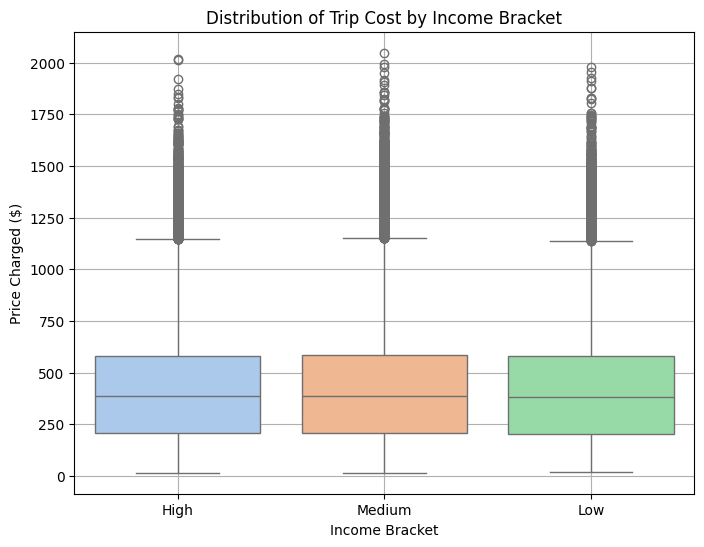

In [38]:
# define income brackets
def income_bracket(income):
    if income < 8424.000000:
        return 'Low'
    elif 8424.000000 <= income < 21034.000000:
        return 'Medium'
    else:
        return 'High'

df['Income Bracket'] = df['Income (USD/Month)'].map(income_bracket)

# reorder the income brackets to display in the order: High, Medium, Low
df['Income Bracket'] = pd.Categorical(df['Income Bracket'], categories=['High', 'Medium', 'Low'], ordered=True)

print(df['Income Bracket'].value_counts())

# reorder brackets
df['Income Bracket'] = pd.Categorical(df['Income Bracket'], categories=['High', 'Medium', 'Low'], ordered=True)

# create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income Bracket', y='Price Charged', data=df.sort_values('Income Bracket'), palette="pastel")
plt.title("Distribution of Trip Cost by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Price Charged ($)")
plt.grid(True)
plt.show()

There is no significant difference between income brackets in terms of price charged, but customers of "high" income have a slightly higher median cost.

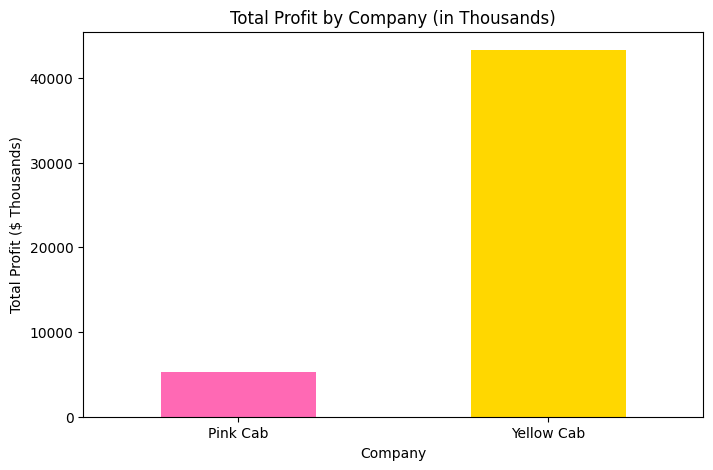

In [39]:
# calculate total profit for each cab company
profit_by_company = df.groupby('Company')['Profit'].sum()

profit_by_company_in_thousands = profit_by_company / 1000

# create bar chart
plt.figure(figsize=(8, 5))
profit_by_company_in_thousands.plot(kind='bar', color=['#FF69B4', '#FFD700'])
plt.title("Total Profit by Company (in Thousands)")
plt.xlabel("Company")
plt.ylabel("Total Profit ($ Thousands)")
plt.xticks(rotation=0)

plt.show()

The **Yellow Cab** company clearly makes more profit than the Pink Cab company.

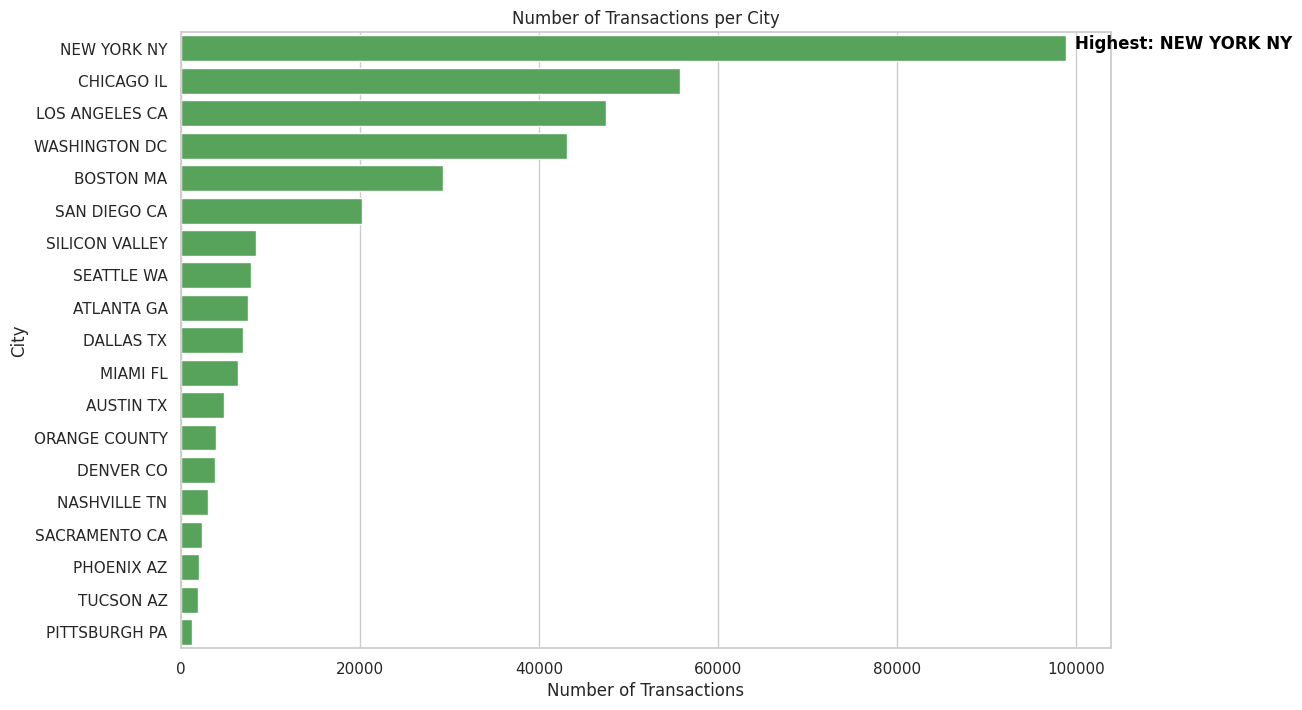

In [40]:
city_transaction_counts = df['City'].value_counts().head(20)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=city_transaction_counts.values, y=city_transaction_counts.index, color="#4CAF50")  # Using green color

# add labels and title
plt.title("Number of Transactions per City")
plt.xlabel("Number of Transactions")
plt.ylabel("City")

max_city = city_transaction_counts.idxmax()
max_value = city_transaction_counts.max()
plt.text(max_value + 1000, city_transaction_counts.index.get_loc(max_city), f"Highest: {max_city}", color="black", weight="bold")

plt.show()


New York, NY is the city with the most amount of transactions.

# Part 3: Hypotheses

## Hypothesis 1



*   Null Hypothesis (H₀): There is no significant difference in cab service usage frequency between higher-income and lower-income customers.
*   Alternate Hypothesis (H₁): Higher-income customers use cab services more frequently than lower-income customers.



<ipython-input-41-798d29ebf519>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_frequency = df.groupby(['Income Bracket', 'Company']).size().unstack().fillna(0)


<Figure size 1000x600 with 0 Axes>

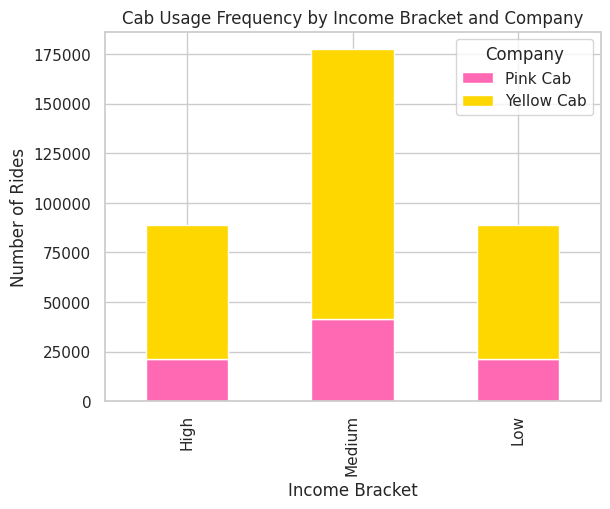

In [41]:
# calculate the usage frequency by income bracket and company
usage_frequency = df.groupby(['Income Bracket', 'Company']).size().unstack().fillna(0)

# plot results
plt.figure(figsize=(10, 6))
usage_frequency.loc[['High', 'Medium', 'Low']].plot(kind='bar', stacked=True, color=['#FF69B4', '#FFD700'])
plt.title("Cab Usage Frequency by Income Bracket and Company")
plt.xlabel("Income Bracket")
plt.ylabel("Number of Rides")
plt.legend(title="Company")
plt.show()

## Hypothesis 2



*   Null Hypothesis (H₀): There is no significant difference in cab usage frequency between genders.
*   Alternate Hypothesis (H₁): There is a significant difference in cab usage frequency between genders.



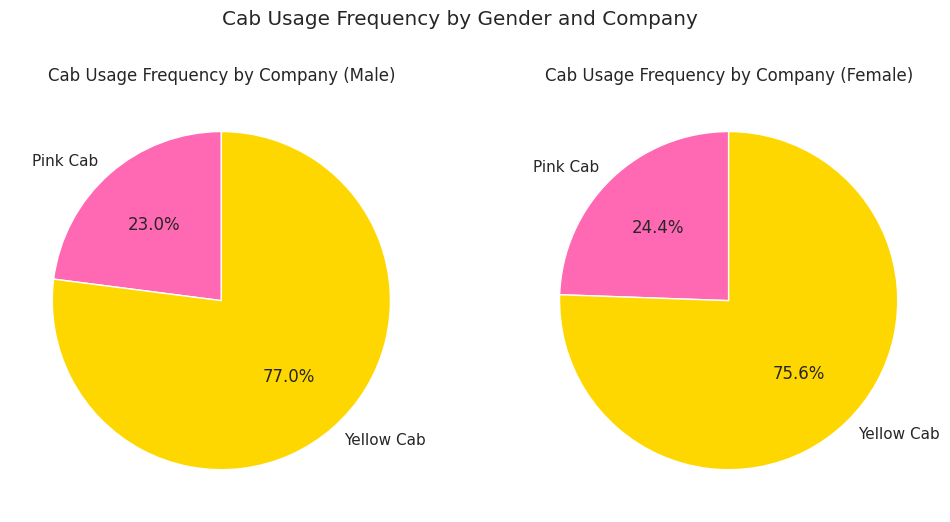

In [42]:
# calculate the usage frequency by gender and company
usage_frequency_gender = df.groupby(['Gender', 'Company']).size().unstack().fillna(0)

# plot using pie charts
plt.figure(figsize=(12, 6))

# male pie cahrt
plt.subplot(1, 2, 1)
plt.pie(usage_frequency_gender.loc['Male'], labels=usage_frequency_gender.columns, autopct='%1.1f%%', startangle=90, colors=['#FF69B4', '#FFD700'])
plt.title("Cab Usage Frequency by Company (Male)")

# female pie chart
plt.subplot(1, 2, 2)
plt.pie(usage_frequency_gender.loc['Female'], labels=usage_frequency_gender.columns, autopct='%1.1f%%', startangle=90, colors=['#FF69B4', '#FFD700'])
plt.title("Cab Usage Frequency by Company (Female)")

plt.suptitle("Cab Usage Frequency by Gender and Company")
plt.show()


## Hypothesis 3



*   Null Hypothesis (H₀): There is no significant seasonality in the number of customers using the cab service.base.
*   Alternate Hypothesis (H₁): There is significant seasonality in the number of customers using the cab service, with certain months or seasons seeing higher usage.



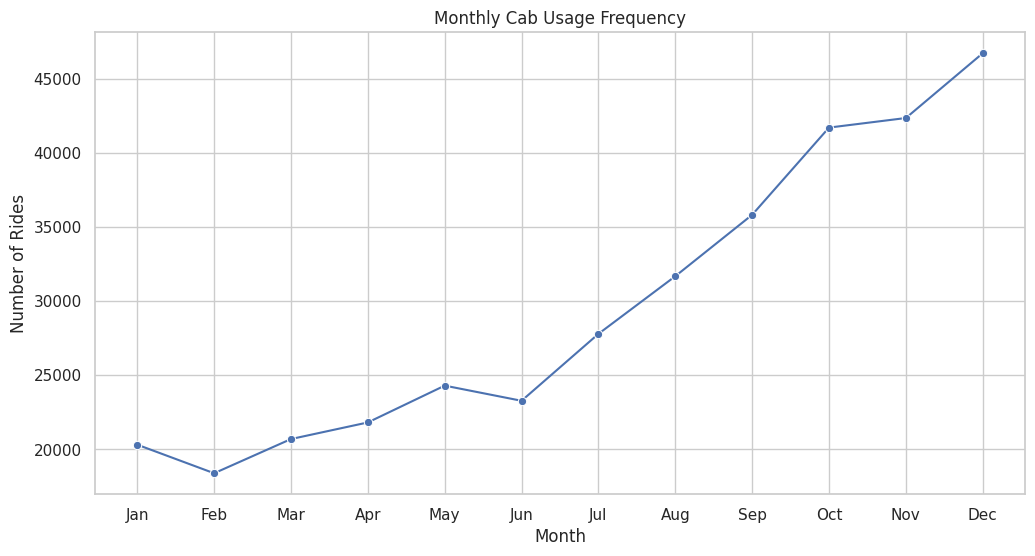

In [43]:
df['Month'] = df['Date of Travel'].dt.month

# calculate rides/month
monthly_usage = df.groupby('Month').size().reset_index(name='Number of Rides')

# plot results
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_usage, x='Month', y='Number of Rides', marker='o')
plt.title("Monthly Cab Usage Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

## Hypothesis 4



*   Null Hypothesis (H₀): There is no significant relationship between trip distance and profitability.
*   Alternate Hypothesis (H₁): Longer trips generate higher profitability per ride.



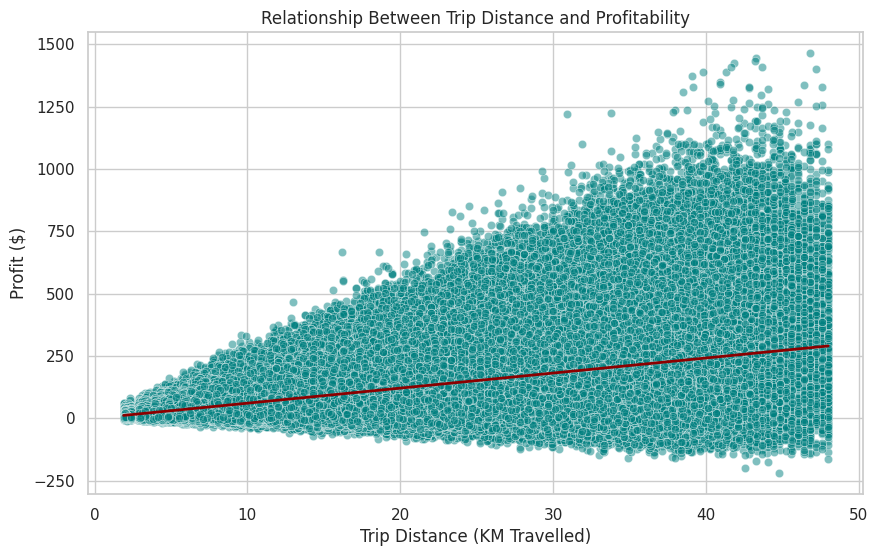

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM Travelled', y='Profit', data=df, alpha=0.5, color='teal')

# add trend line
sns.regplot(x='KM Travelled', y='Profit', data=df, scatter=False, color='darkred', line_kws={"linewidth": 2})

# labels and title
plt.title("Relationship Between Trip Distance and Profitability")
plt.xlabel("Trip Distance (KM Travelled)")
plt.ylabel("Profit ($)")
plt.grid(True)

plt.show()


## Hypothesis 5



*   Null Hypothesis (H₀): Income level does not influence the preference for one cab company over another.
*  Alternate Hypothesis (H₁): Higher-income customers show a preference for one cab company over the other.



<ipython-input-45-c5cc6d46caa6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  company_preference = df.groupby(['Income Bracket', 'Company']).size().unstack().fillna(0)


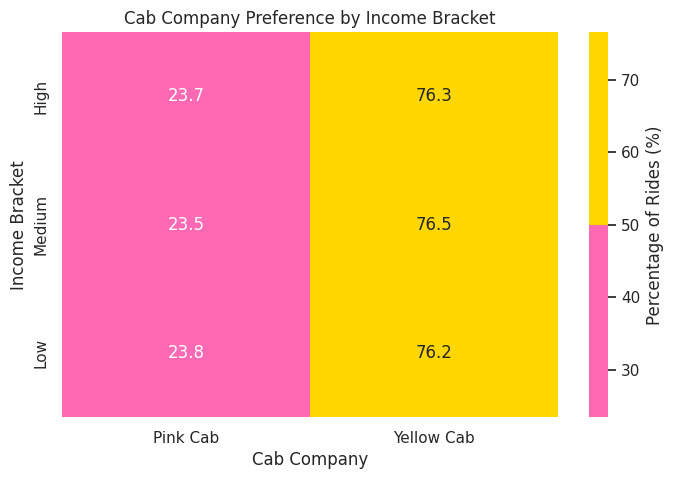

In [45]:
company_preference = df.groupby(['Income Bracket', 'Company']).size().unstack().fillna(0)
company_preference_percentage = company_preference.div(company_preference.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(company_preference_percentage, annot=True, fmt=".1f",
            cmap=sns.color_palette(["#FF69B4", "#FFD700"]),
            cbar_kws={'label': 'Percentage of Rides (%)'})
plt.title("Cab Company Preference by Income Bracket")
plt.xlabel("Cab Company")
plt.ylabel("Income Bracket")
plt.show()

# Part 4: Conclusion

## Results

1. **Cab Service Usage Frequency by Income Level**

The null hypothesis does not hold true since the data supports the alternate hypothesis where higher-income customers do indeed use cab services more frequently than lower-income customers.

2. **Cab Usage Frequency by Gender**


*   Male Customers
      - 77.1% of rides were with Yellow Cab.
      - 22.9% of rides were with Pink Cab.
*   Female Customers
      - 75.6% of rides were with Yellow Cab.
      - 24.4% of rides were with Pink Cab.

The null hypothesis is supported as the data does not show a substantial difference in cab usage frequency between genders.

3. The null hypothesis is rejected since there is evidence of seasonal variation. The data shows a clear seasonal trend, especially with a gradual increase in usage from mid-year (June/July) to the end of the year.

4. The null hypothesis is not supported as the scatter plot and trend line indicate a positive relationship between trip distance and profitability. As the trip distance increases, the profit also tends to increase. Although there's an upward trend, there's also considerable variability, especially for longer trips.

5. The data supports the null hypothesis, indicating that income level does not significantly influence the preference for one cab company over another. The percentages for each cab company remain relatively stable across all income brackets.



## Reccomendation Based on Analysis

1. **Target all Income segments Equally**
Invest equally in attracting customers across all income brackets, as usage is not highly dependent on income.

2. **Increase Driver Availability During Peak Months**: Ensure that there are enough drivers on the road during high-demand months to avoid shortages and improve customer satisfaction.

  **Seasonal Promotions**: Launch targeted promotions during peak times (e.g., summer and December) to maximize profitability.
3. **Incentivize Longer Trips**: Consider offering discounts or loyalty points for longer trips to encourage customers to take rides over greater distances.

4. **Provide Flexible Payment Options**: Offer multiple payment options (e.g., card, cash, digital wallets, in-app payment) accommodates a broader customer base and improves user convenience. Consider partnering with popular payment providers for added convenience and possible promotional deals.